## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [16]:
#1
df = pd.read_table('https://raw.githubusercontent.com/Yurohime/DATA-MINING-SEMESTER-5/refs/heads/main/datasets/bread%20basket.csv',delimiter=',')
df.head(5)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
#3 check missing values
df.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a _________________________. (fill that blank on the section below)

The Overview reveals a raw data that is fine. it contains no null data, and there is several thousands of them

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

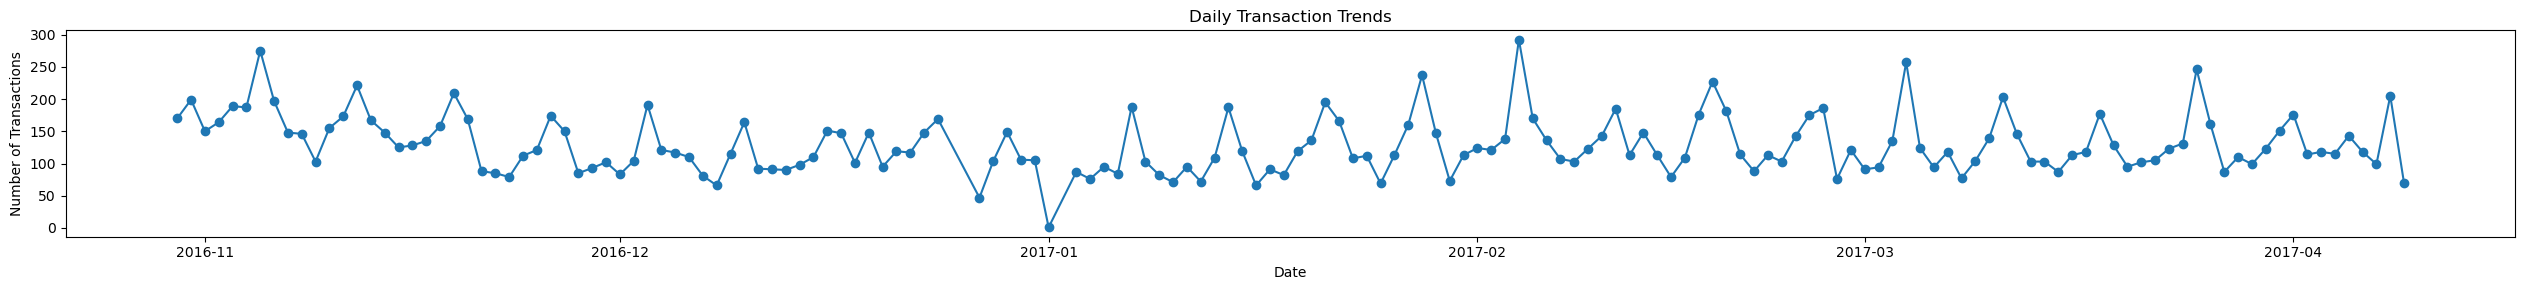

In [17]:
# 5
df_new = df

df_new['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M", errors='coerce')

df_new['date'] = df['date_time'].apply(lambda x: x.date() if pd.notnull(x) else None)
df_new['hour'] = df['date_time'].apply(lambda x: x.hour if pd.notnull(x) else None)
df_new['weekday'] = df['date_time'].apply(lambda x: x.strftime('%A') if pd.notnull(x) else None)

# Group by hour
hourly_trends = df.groupby('hour')['Transaction'].count()

# Group by date
daily_trends = df.groupby('date')['Transaction'].count()

# Daily Trends
plt.subplot(1, 2, 2)
daily_trends.plot(kind='line', marker='o')
plt.rcParams["figure.figsize"] = (50,3)
plt.title("Daily Transaction Trends")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [18]:
# 6
df_new = df

df_new['hour'] = df['date_time'].apply(lambda x: x.hour if pd.notnull(x) else None)
df_new['time'] = df['date_time'].apply(lambda x: x.strftime('%H:%M:%S') if pd.notnull(x) else None)
df_new['day'] = df['date_time'].apply(lambda x: x.day if pd.notnull(x) else None)
df_new['day_name'] = df['date_time'].apply(lambda x: x.strftime('%A') if pd.notnull(x) else None)
df_new['month'] = df['date_time'].apply(lambda x: x.month if pd.notnull(x) else None)
df_new['year'] = df['date_time'].apply(lambda x: x.year if pd.notnull(x) else None)

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,weekday,time,day,day_name,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,9,Sunday,09:58:00,30,Sunday,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,Sunday,10:05:00,30,Sunday,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,Sunday,10:05:00,30,Sunday,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,Sunday,10:07:00,30,Sunday,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,Sunday,10:07:00,30,Sunday,10,2016



Alright, now I can easily create a visualization of monthly sales.

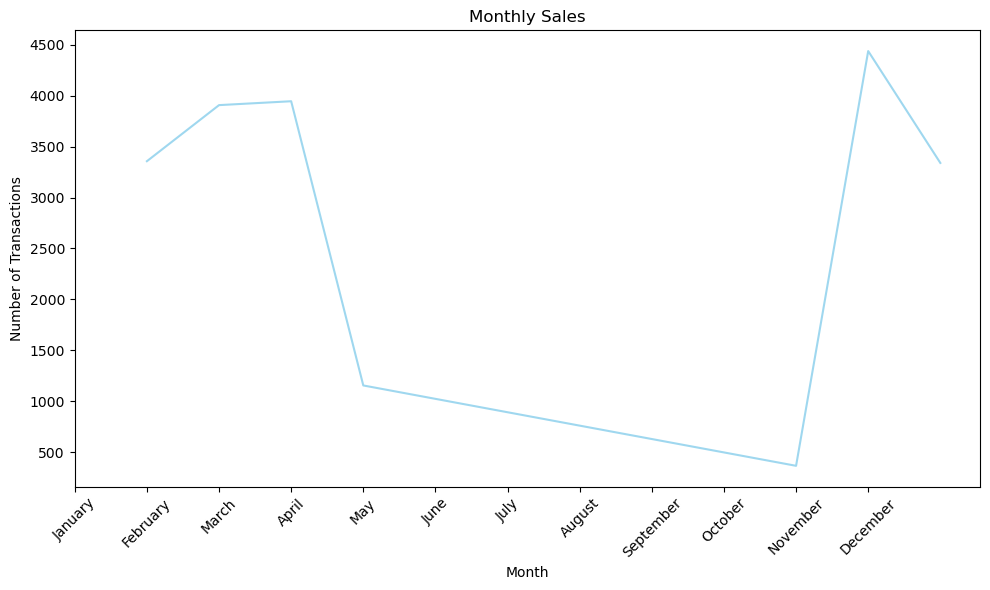

In [29]:
# 7
monthly_sales = df.groupby('month')['Transaction'].count()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='skyblue', alpha=0.8)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: It's more active during november till april, may till october it drops
.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [31]:
#9
# Get unique weekday names
weekday_names = df.loc[df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'day_name'].unique()

# Get unique weekend names
weekend_names = df.loc[df['day_name'].isin(['Sunday', 'Saturday']), 'day_name'].unique()

# Results
print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)


Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [36]:
#10
# Aggregate total transactions by month and day_name
aggregated_data = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()

# Pivot the table to make 'day_name' the columns
pivot_data = aggregated_data.pivot(index='month', columns='day_name', values='Transaction').fillna(0)

# Display the pivot table
pivot_data.head()


day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,489.0,329.0,807.0,536.0,399.0,474.0,322.0
2,599.0,474.0,879.0,650.0,456.0,429.0,419.0
3,674.0,379.0,883.0,559.0,557.0,433.0,459.0
4,99.0,118.0,381.0,183.0,118.0,115.0,143.0
10,0.0,199.0,0.0,170.0,0.0,0.0,0.0


11. Wow, it turns out the insight that can be gained from the table above is weekends and near weekends it picks up the pace


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

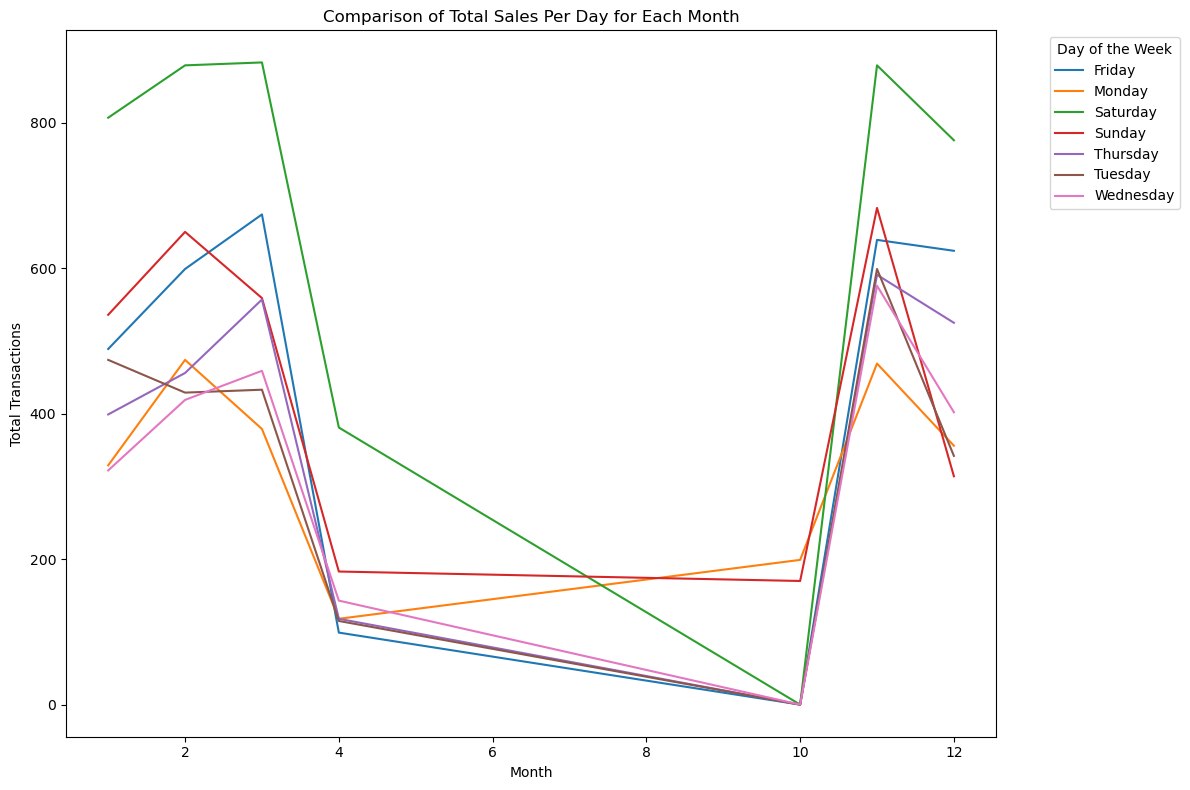

In [37]:
# 12
pivot_data.plot(kind='line', figsize=(12, 8))

# Add title and labels
plt.title("Comparison of Total Sales Per Day for Each Month")
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.legend(title="Day of the Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that its more active during saturday then any other day because its probably a weekend

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [40]:
# 14
unique_periods = df['period_day'].unique()
unique_periods



array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [41]:
# 15

# Extract hours from the 'date_time' column
df['hour'] = df['date_time'].dt.hour

# Find unique hours for each period
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

# Output the unique hours for each period
print(f"Unique morning_hours: {morning_hours}")
print(f"Unique afternoon_hours: {afternoon_hours}")
print(f"Unique evening_hours: {evening_hours}")
print(f"Unique night_hours: {night_hours}")


Unique morning_hours: [ 9 10 11  8  7  1]
Unique afternoon_hours: [12 13 14 15 16]
Unique evening_hours: [17 18 19 20]
Unique night_hours: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

morning is missing some data, so is some night hours. probably because nobody orders from that time


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

<Figure size 1400x800 with 0 Axes>

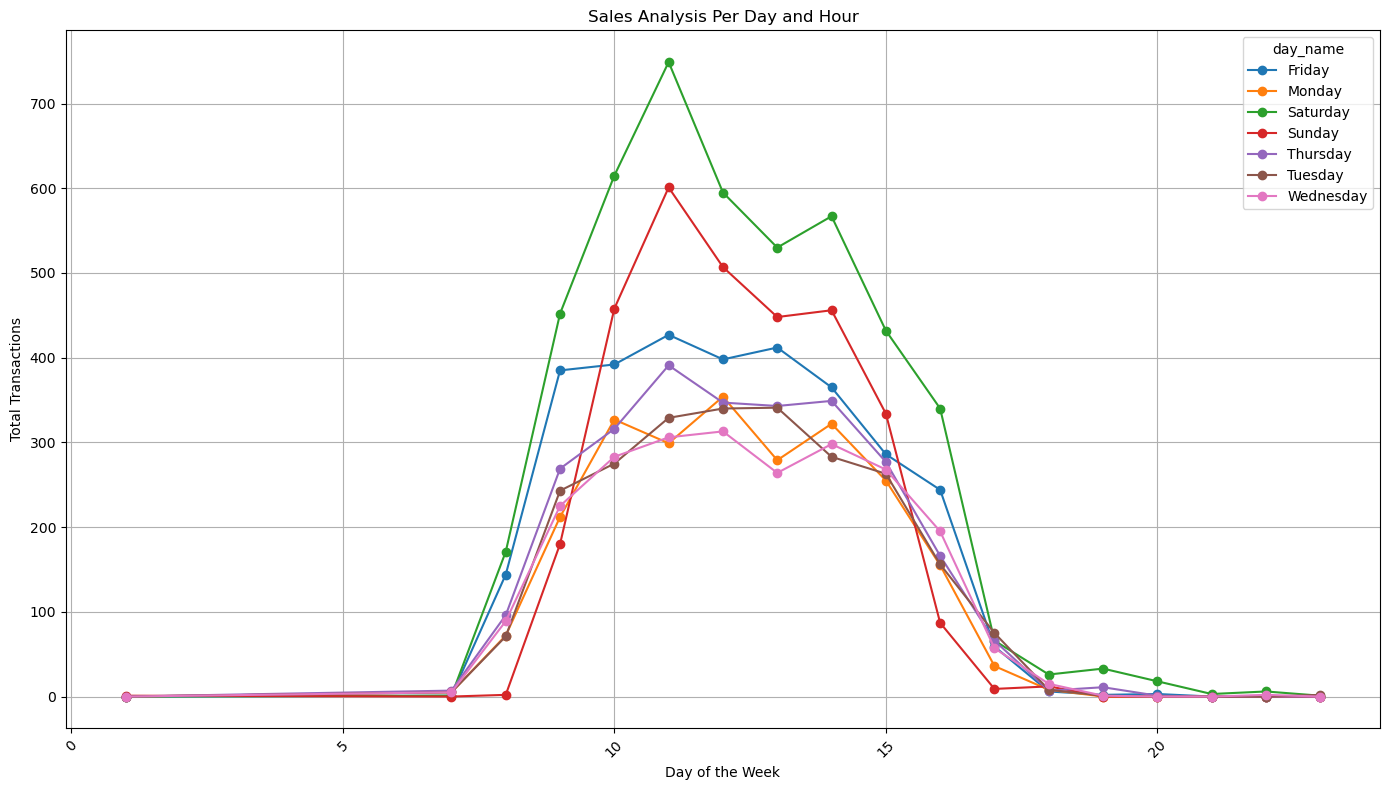

In [47]:
# 17
# Extract the day of the week and hour from 'date_time'
df['day_name'] = df['date_time'].dt.day_name()  # Gets the day of the week (e.g., Monday)
df['hour'] = df['date_time'].dt.hour  # Gets the hour of the day

# Aggregate total transactions by day_name and hour
daily_hourly_sales = df.groupby(['hour', 'day_name'])['Transaction'].count().reset_index()

# Pivot the table to make 'hour' as columns and 'day_name' as rows
pivot_data = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)

# Plotting the comparison
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', figsize=(14, 8), marker='o')

# Add title and labels
plt.title('Sales Analysis Per Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

18. The daily sales trend plot reveals that sunday and saturday is the most popular time for the sales, and also its strongest on noon till evening ish

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

<Figure size 1000x1600 with 0 Axes>

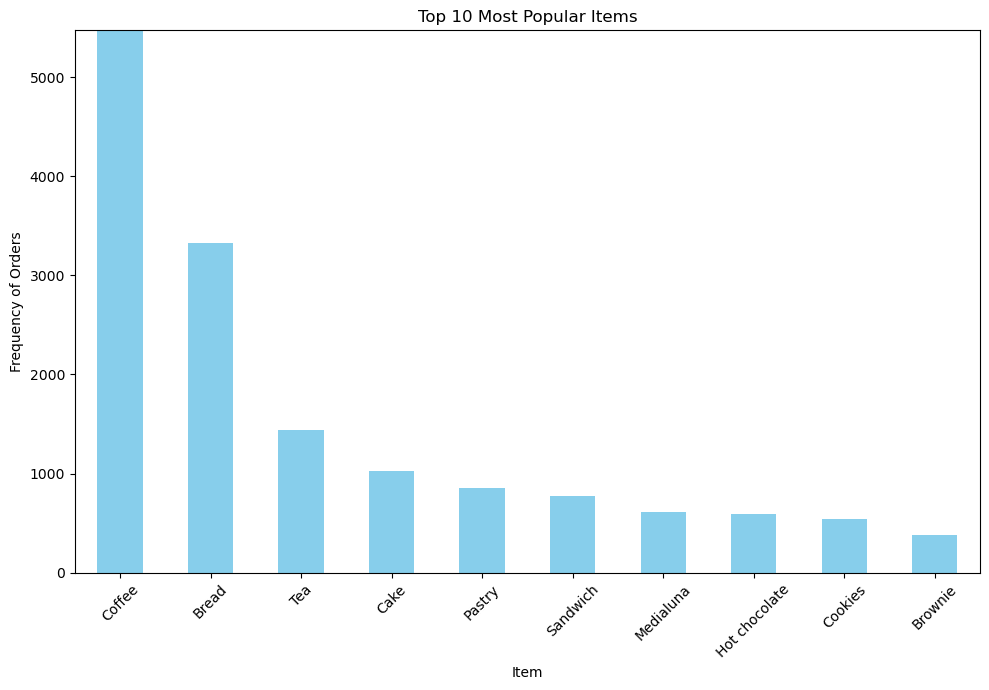

In [74]:
# 19
item_sales = df['Item'].value_counts().reset_index()
item_sales.columns = ['Item', 'Frequency']

plt.figure(figsize=(10, 16))
item_sales.head(10).plot(kind='bar', x='Item', y='Frequency', legend=False, color='skyblue', figsize=(10, 7))

plt.title('Top 10 Most Popular Items')
plt.xlabel('Item')
plt.ylabel('Frequency of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.margins(0.05, 0) 

plt.show()
# Show the plot


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

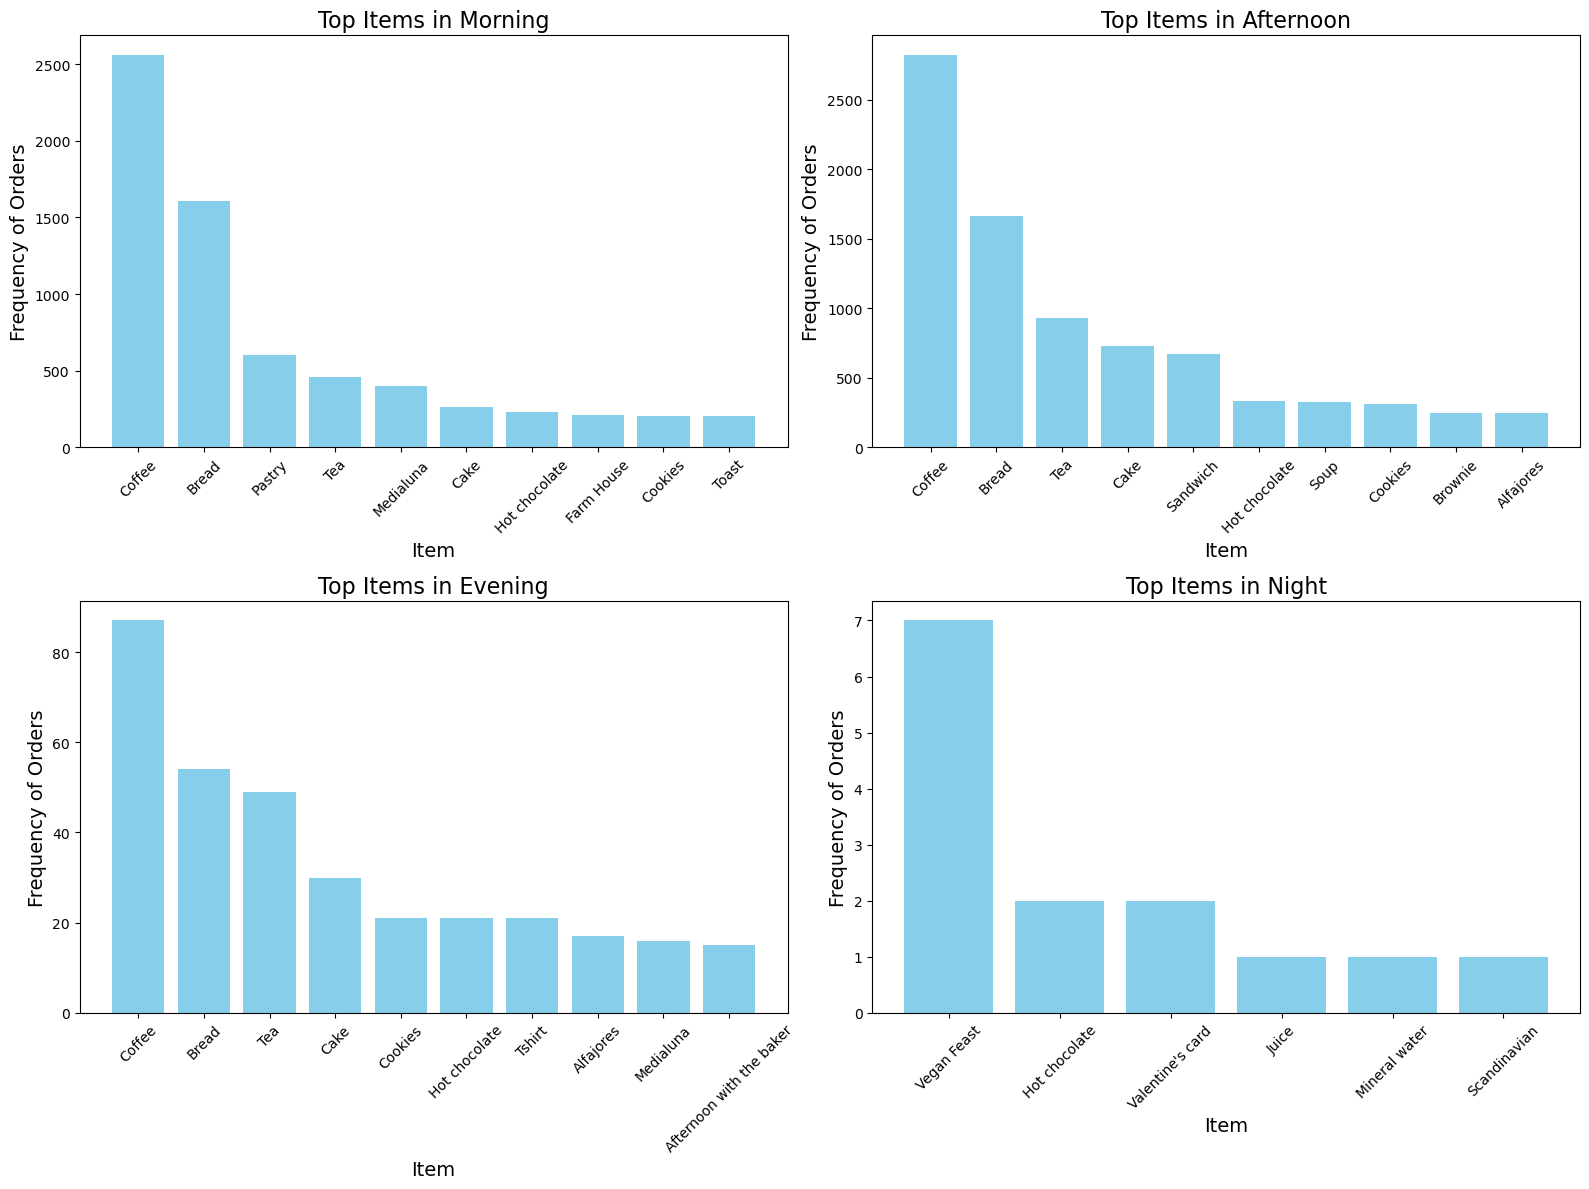

In [76]:
# 20
# Group the data by period_day and Item, then count the frequency of each item
period_item_sales = df.groupby(['period_day', 'Item'])['Transaction'].count().reset_index()

# Sort the items by frequency within each period_day
period_item_sales_sorted = period_item_sales.sort_values(['period_day', 'Transaction'], ascending=[True, False])

# Create a figure with 4 subplots (one for each period)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns for 4 periods

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each period
for idx, period in enumerate(df['period_day'].unique()):
    period_data = period_item_sales_sorted[period_item_sales_sorted['period_day'] == period]
    axes[idx].bar(period_data['Item'].head(10), period_data['Transaction'].head(10), color='skyblue')
    axes[idx].set_title(f'Top Items in {period.capitalize()}', fontsize=16)
    axes[idx].set_xlabel('Item', fontsize=14)
    axes[idx].set_ylabel('Frequency of Orders', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


21. It turns out that there is something different in the plot above, the insight is that it does change slightly between periods with night being the most drastic, apparently people dont like drinking coffe at night


I found a valentine card, I was curious about when people bought it so I made a visualization of it

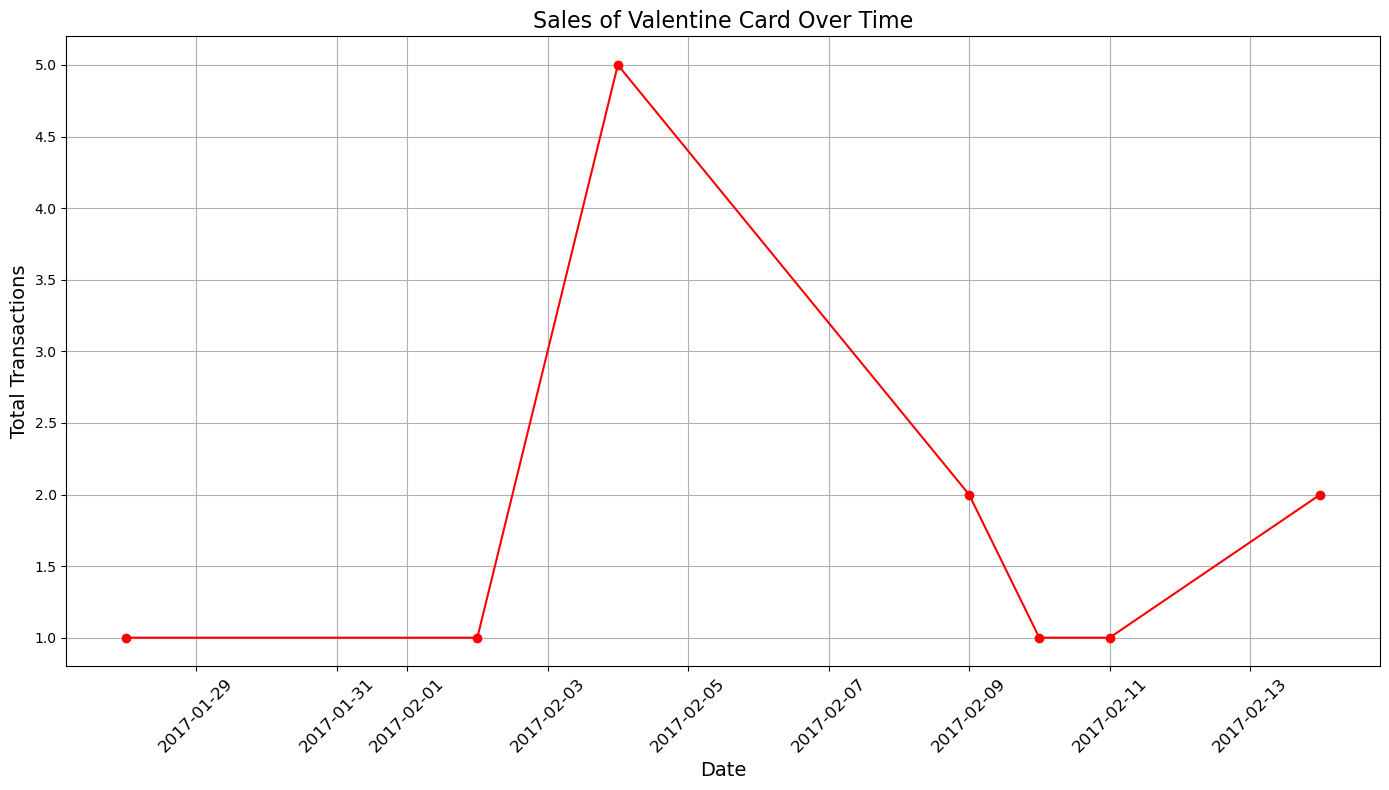

In [81]:
#22
# Filter the dataframe for Valentine Card
valentine_sales = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions
valentine_sales_date = valentine_sales.groupby(valentine_sales['date_time'].dt.date)['Transaction'].count().reset_index()

# Plotting the sales over time (by date)
plt.figure(figsize=(14, 8))
plt.plot(valentine_sales_date['date_time'], valentine_sales_date['Transaction'], marker='o', color='red')

# Add title and labels
plt.title('Sales of Valentine Card Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Transactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


23. I found the insight from the sale of the Valentine's cards above is as you expected, people buy it before valentines


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [93]:
# 24
import pandas as pd

# Assuming your dataset is in a DataFrame called `df`
# Step 1: Group by Transaction ID
grouped = df.groupby('Transaction')['Item'].apply(list)

# Step 2: Convert to one-hot encoding
from mlxtend.preprocessing import TransactionEncoder

# Convert to a list of lists for the TransactionEncoder
transactions = grouped.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

# Create a DataFrame from the encoded array
apriori_df = pd.DataFrame(te_array, columns=te.columns_)

# Display the transformed DataFrame
apriori_df


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
#25

# Convert quantities to 1 and 0
df['Item'] = df['Item'].astype(str)  # Ensure items are strings
transaction_item_matrix = df.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)

# Step 2: Convert quantities to binary
binary_matrix = (transaction_item_matrix > 0).astype(int)

# Display the binary matrix
binary_matrix



Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [97]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(binary_matrix, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Frequent Itemsets:")
print(frequent_itemsets)





Frequent Itemsets:
     support                 itemsets
0   0.036344              (Alfajores)
1   0.327205                  (Bread)
2   0.040042                (Brownie)
3   0.103856                   (Cake)
4   0.478394                 (Coffee)
5   0.054411                (Cookies)
6   0.039197             (Farm House)
7   0.058320          (Hot chocolate)
8   0.038563                  (Juice)
9   0.061807              (Medialuna)
10  0.038457                 (Muffin)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
13  0.029054           (Scandinavian)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
16  0.142631                    (Tea)
17  0.033597                  (Toast)
18  0.020285               (Truffles)
19  0.023349            (Bread, Cake)
20  0.090016          (Bread, Coffee)
21  0.029160          (Pastry, Bread)
22  0.028104             (Bread, Tea)
23  0.054728           (Coffee, Cake)
24  0.023772              (Tea,

C:\Users\Lolz\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [100]:
# 27
print("\nAssociation Rules:")
rules.head()


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

I've compiled some statistics from the data, here's a short list of what i've come up with.

A line plot showing sales for each day of the week revealed clear spikes in sales on weekends, with Saturday and Sunday showing the highest purchase activity. This pattern suggests that customers are more likely to make larger or more varied purchases during the weekend.

Analyzing the sales by time of day (morning, afternoon, evening, night) revealed that the noon period consistently saw higher transaction volumes, likely due to customers purchasing items for breakfast.

Given the popularity of basic food items like Coffee and Bread, the store should ensure these items are always in stock and potentially offer combo deals or discounts for these items.

The Apriori algorithm identified several frequent item combinations. For example, Bread and Coffee frequently appeared together in the same transactions, which could suggest a common purchasing pattern.

